In [1]:
import csv 
filename = "train_V2.csv"
fields = [] 
rows = [] 

with open(filename, 'r') as csvfile: 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 
      
    # extracting field names through first row 
    fields = next(csvreader) 
  
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row) 
  
    # get total number of rows 
    print("Total no. of rows: %d"%(csvreader.line_num)) 
    
print('Field names are:' + ', '.join(field for field in fields))   


Total no. of rows: 4446967
Field names are:Id, groupId, matchId, assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, killPoints, kills, killStreaks, longestKill, matchDuration, matchType, maxPlace, numGroups, rankPoints, revives, rideDistance, roadKills, swimDistance, teamKills, vehicleDestroys, walkDistance, weaponsAcquired, winPoints, winPlacePerc


In [2]:
#finding...
for i in range(len(fields)):
    print(i, fields[i])

0 Id
1 groupId
2 matchId
3 assists
4 boosts
5 damageDealt
6 DBNOs
7 headshotKills
8 heals
9 killPlace
10 killPoints
11 kills
12 killStreaks
13 longestKill
14 matchDuration
15 matchType
16 maxPlace
17 numGroups
18 rankPoints
19 revives
20 rideDistance
21 roadKills
22 swimDistance
23 teamKills
24 vehicleDestroys
25 walkDistance
26 weaponsAcquired
27 winPoints
28 winPlacePerc


In [3]:
#find the number of kills for each...
import numpy as np
DBNOs=[]
headshot=[]
killStreaks=[]
longestKill=[]
revives=[]
ridedistance=[]
swimdistance=[]
walkdistance=[]
weaponsAquired=[]

winnerkills=[]
matchtype=[]
player=[]
assist=[]
dam=[]
matchDuration=[]
won=[]
boosts=[]
heals=[]
for row in rows[:10000]:
    DBNOs.append(float(row[6]))
    headshot.append(float(row[7]))
    killStreaks.append(float(row[12]))
    longestKill.append(float(row[13]))
    revives.append(float(row[19]))
    ridedistance.append(float(row[20]))
    swimdistance.append(float(row[22]))
    walkdistance.append(float(row[25]))
    weaponsAquired.append(float(row[26]))
    #player.append(row[0])
    if row[0] in player == True:
        print("uhoh")
    if row[15]=='squad-fpp':
        matchtype.append(1)
    elif row[15]=='duo-fpp':
        matchtype.append(2)
    elif row[15]=='solo':
        matchtype.append(3)
    elif row[15]=='solo-fpp':
        matchtype.append(4)
    elif row[15]=='duo':
        matchtype.append(5)
    else:
        matchtype.append(6)
    #if int(row[27])>0:
    winnerkills.append(float(row[11]))
    assist.append(float(row[3]))
    dam.append(float(row[5]))
    matchDuration.append(float(row[14]))
    if int(row[27])>0:
        won.append(1)
    else:
        won.append(0)
    boosts.append(float(row[4]))
    heals.append(float(row[8]))
DBNOs=np.array(DBNOs)
DBNOs=DBNOs.reshape(-1,1)
headshot=np.array(headshot)
headshot=headshot.reshape(-1,1)
killStreaks=np.array(killStreaks)
killStreaks=killStreaks.reshape(-1,1)
longestKill=np.array(longestKill)
longestKill=longestKill.reshape(-1,1)
revives=np.array(revives)
revives=revives.reshape(-1,1)
ridedistance=np.array(ridedistance)
ridedistance=ridedistance.reshape(-1,1)
swimdistance=np.array(swimdistance)
swimdistance=swimdistance.reshape(-1,1)
walkdistance=np.array(walkdistance)
walkdistance=walkdistance.reshape(-1,1)
weaponsAquired=np.array(weaponsAquired)
weaponsAquired=weaponsAquired.reshape(-1,1)
    

winnerkills=np.array(winnerkills)
winnerkills=winnerkills.reshape(-1,1)
matchtype=np.array(matchtype)
matchtype=matchtype.reshape(-1,1)
player=np.array(player)
player=player.reshape(-1,1)
assist=np.array(assist)
assist=assist.reshape(-1,1)
dam=np.array(dam)
dam=dam.reshape(-1,1)
matchDuration=np.array(matchDuration)
matchDuration=matchDuration.reshape(-1,1)
boosts=np.array(boosts)
boosts=boosts.reshape(-1,1)
heals=np.array(heals)
heals=heals.reshape(-1,1)

In [4]:
X=np.hstack((winnerkills,matchtype))
X=np.hstack((X,assist))
X=np.hstack((X,dam))
X=np.hstack((X,matchDuration))
X=np.hstack((X,boosts))
X=np.hstack((X,heals))
X=np.hstack((X,DBNOs))
X=np.hstack((X,headshot))
X=np.hstack((X,killStreaks))
X=np.hstack((X,longestKill))
X=np.hstack((X,revives))
X=np.hstack((X,ridedistance))
X=np.hstack((X,swimdistance))
X=np.hstack((X,walkdistance))
X=np.hstack((X,weaponsAquired))
#print(X)


[[-9.30200000e-01 -1.70270000e+00 -2.27900000e-01 ... -4.29318409e+00
  -8.95558971e+02 -2.65450000e+00]
 [-9.30200000e-01 -1.70270000e+00 -2.27900000e-01 ...  6.74681591e+00
   2.93641029e+02  1.34550000e+00]
 [-9.30200000e-01  2.29730000e+00  7.72100000e-01 ... -4.29318409e+00
  -9.78558971e+02 -1.65450000e+00]
 ...
 [ 6.98000000e-02  3.29730000e+00 -2.27900000e-01 ...  1.59906816e+02
   1.09764103e+03  1.34550000e+00]
 [ 6.98000000e-02  1.29730000e+00 -2.27900000e-01 ... -4.29318409e+00
  -1.39358971e+02  3.45500000e-01]
 [-9.30200000e-01 -1.70270000e+00  7.72100000e-01 ... -4.29318409e+00
  -6.99958971e+02 -1.65450000e+00]]
[[ 2.29109895e-04  3.79735432e-05  7.30370080e-05  2.91450373e-02
   6.00697933e-02  5.50491953e-04  6.68170294e-04  1.39685442e-04
   6.27336399e-05  9.42134669e-05  1.00105687e-02  5.10270106e-05
   9.01279582e-01  1.59644139e-03  4.27940723e-01  6.60231183e-04]
 [ 4.86003302e-04 -7.73878756e-05  1.13221342e-04  5.38662074e-02
  -1.94428739e-02  7.34686222e-04

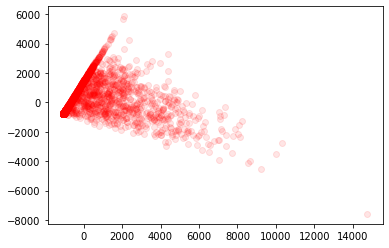

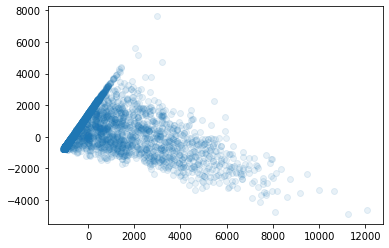

In [5]:

'''nom = (X-X.min(axis=0))*(2)
denom = X.max(axis=0) - X.min(axis=0)
denom[denom==0] = 1
totalX_centered = -1 + nom/denom'''
#totalX_centered1=X-np.mean(X,axis=0)
#totalX_centered = totalX_centered1 / np.abs(totalX_centered1).max(axis=0)
totalX_centered=X-np.mean(X,axis=0)
print(totalX_centered)
from scipy import linalg as LA
import matplotlib.pyplot as plt
U,s,Vh=LA.svd(totalX_centered, full_matrices=False)
subspace=Vh[0:2,:]
print(subspace)
sub1=Vh[0:1,:][0]
sub2=Vh[1:2,:][0]
sub=np.array([sub1,sub2])
print(sub)
#projection on PCA
projection=np.dot(totalX_centered,sub.T)
#print(projection)
#print(won)
wonpro=np.array([1,2])
lostpro=np.array([1,2])
for i in range(len(won)):
    if won[i]==0:
        lostpro=np.vstack((lostpro,projection[i]))
    else:
        wonpro=np.vstack((wonpro,projection[i]))
print(len(wonpro))
print(len(lostpro))
plt.scatter(wonpro[1:,0],wonpro[1:,1],color='red',alpha=.1)
plt.show()
plt.scatter(lostpro[1:,0],lostpro[1:,1],alpha=.1)
plt.show()

[[-9.30200000e-01 -1.70270000e+00 -2.27900000e-01 ... -4.29318409e+00
  -8.95558971e+02 -2.65450000e+00]
 [-9.30200000e-01 -1.70270000e+00 -2.27900000e-01 ...  6.74681591e+00
   2.93641029e+02  1.34550000e+00]
 [-9.30200000e-01  2.29730000e+00  7.72100000e-01 ... -4.29318409e+00
  -9.78558971e+02 -1.65450000e+00]
 ...
 [ 6.98000000e-02  3.29730000e+00 -2.27900000e-01 ...  1.59906816e+02
   1.09764103e+03  1.34550000e+00]
 [ 6.98000000e-02  1.29730000e+00 -2.27900000e-01 ... -4.29318409e+00
  -1.39358971e+02  3.45500000e-01]
 [-9.30200000e-01 -1.70270000e+00  7.72100000e-01 ... -4.29318409e+00
  -6.99958971e+02 -1.65450000e+00]]


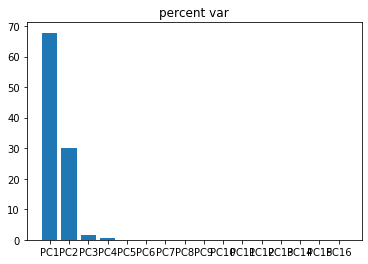

0.02241
[[   0.            0.        ]
 [-414.08896294  520.18099864]
 [-986.79465584 -619.13817489]
 ...
 [ 549.47044316  952.96712335]
 [-622.73312545  139.70224994]
 [-835.71266513 -380.19279304]]


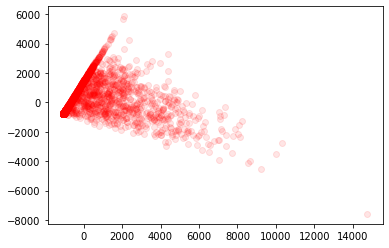

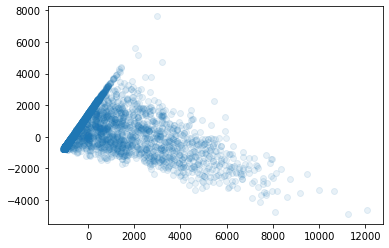

"from sklearn.decomposition import PCA\nprint(totalX_centered[1])\npca = PCA(n_components=2)\n\nnewx=pca.fit_transform(totalX_centered)\nwonpr=np.array([1,2])\nlostpr=np.array([1,2])\nfor i in range(len(won)):\n    if won[i]==0:\n        lostpr=np.vstack((lostpr,newx[i]))\n    else:\n        wonpr=np.vstack((wonpr,newx[i]))\nprint(lostpr)\nplt.scatter(wonpr[1:,0],wonpr[1:,1],color='red',alpha=.1)\nplt.scatter(lostpr[1:,0],lostpr[1:,1],alpha=.1)\nplt.show()"

In [6]:
print(totalX_centered)
from sklearn.decomposition import PCA
pca1 = PCA()
pca1.fit(totalX_centered)
pca_data=pca1.transform(totalX_centered)

pervar=np.round(pca1.explained_variance_ratio_* 100,decimals=5)
labels=['PC'+str(x) for x in range(1,len(pervar)+1)]
plt.bar(x=range(1,len(pervar)+1),height=pervar,tick_label=labels)
plt.title('percent var')
plt.show()

print(pervar[5])

wonpr=np.array([0,0])
lostpr=np.array([0,0])
for i in range(len(won)):
    if won[i]==0:
        lostpr=np.vstack((lostpr,pca_data[i][0:2]))
    else:
        wonpr=np.vstack((wonpr,pca_data[i][0:2]))
print(lostpr)
plt.scatter(wonpr[1:,0],wonpr[1:,1],color='red',alpha=.1)
plt.show()
plt.scatter(lostpr[1:,0],lostpr[1:,1],alpha=.1)
plt.show()


'''from sklearn.decomposition import PCA
print(totalX_centered[1])
pca = PCA(n_components=2)

newx=pca.fit_transform(totalX_centered)
wonpr=np.array([1,2])
lostpr=np.array([1,2])
for i in range(len(won)):
    if won[i]==0:
        lostpr=np.vstack((lostpr,newx[i]))
    else:
        wonpr=np.vstack((wonpr,newx[i]))
print(lostpr)
plt.scatter(wonpr[1:,0],wonpr[1:,1],color='red',alpha=.1)
plt.scatter(lostpr[1:,0],lostpr[1:,1],alpha=.1)
plt.show()'''